<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Band-Definitions" data-toc-modified-id="Band-Definitions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Band Definitions</a></span><ul class="toc-item"><li><span><a href="#Cleveland,-OH" data-toc-modified-id="Cleveland,-OH-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cleveland, OH</a></span></li></ul></li><li><span><a href="#Datatype-conversions" data-toc-modified-id="Datatype-conversions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Datatype conversions</a></span></li><li><span><a href="#Merge-dataframes" data-toc-modified-id="Merge-dataframes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Merge dataframes</a></span></li><li><span><a href="#Plot-Bands" data-toc-modified-id="Plot-Bands-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot Bands</a></span></li></ul></div>

In [86]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=5ecf0b04c2e168e93db676632073bbe087dc53dea8415a1e2f954dabe4fe4f79
  Stored in directory: c:\users\yuvem\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats
import pandas.plotting
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Band Definitions

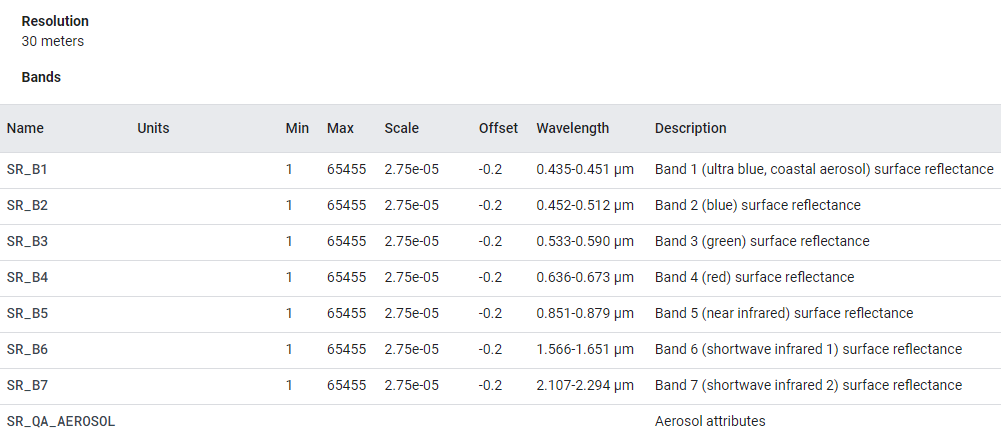

### Cleveland, OH

In [88]:
cle19 = pd.read_csv('D:\Google Earth Engine\CSV files\ee-chart_cle19_T1L2.csv')
cle19.head()

,system:time_start,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
0,1/5/2019,"23,859.55","24,245.51","23,986.13","24,492.70","25,873.18","23,843.18","21,567.47"
1,1/21/2019,"40,473.72","40,360.01","37,706.14","37,590.53","36,120.78","23,760.70","21,062.93"
2,2/22/2019,"9,911.52","10,636.69","11,926.69","12,285.46","14,237.76","13,321.12","12,350.67"
3,3/1/2019,"9,700.14","10,019.80","10,749.25","11,215.15","13,100.01","13,550.72","12,305.37"
4,3/17/2019,"9,593.92","9,904.71","10,655.98","11,212.77","13,290.25","13,918.95","12,595.41"


In [89]:
cle19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   system:time_start  31 non-null     object
 1   SR_B1              31 non-null     object
 2   SR_B2              31 non-null     object
 3   SR_B3              31 non-null     object
 4   SR_B4              31 non-null     object
 5   SR_B5              31 non-null     object
 6   SR_B6              31 non-null     object
 7   SR_B7              31 non-null     object
dtypes: object(8)
memory usage: 2.1+ KB


In [90]:
cle19.rename({'system:time_start':'Date'}, axis=1, inplace=True)

In [91]:
cle19.head()

,Date,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
0,1/5/2019,"23,859.55","24,245.51","23,986.13","24,492.70","25,873.18","23,843.18","21,567.47"
1,1/21/2019,"40,473.72","40,360.01","37,706.14","37,590.53","36,120.78","23,760.70","21,062.93"
2,2/22/2019,"9,911.52","10,636.69","11,926.69","12,285.46","14,237.76","13,321.12","12,350.67"
3,3/1/2019,"9,700.14","10,019.80","10,749.25","11,215.15","13,100.01","13,550.72","12,305.37"
4,3/17/2019,"9,593.92","9,904.71","10,655.98","11,212.77","13,290.25","13,918.95","12,595.41"


## Datatype conversions

In [92]:
import datetime
# Convert Date from object to datetime
cle19['Date'] = pd.to_datetime(cle19['Date'], errors='coerce')

In [93]:
cle19.dtypes

Date     datetime64[ns]
SR_B1            object
SR_B2            object
SR_B3            object
SR_B4            object
SR_B5            object
SR_B6            object
SR_B7            object
dtype: object

In [94]:
def convert_to_float(df):
    return df.str.replace(',','').astype(np.float64)

In [95]:
# Convert bands from object to integer
cle19['SR_B1'] = cle19['SR_B1'].str.replace(',','').astype(np.float64)
cle19['SR_B2'] = cle19['SR_B2'].str.replace(',','').astype(np.float64)
cle19['SR_B3'] = cle19['SR_B3'].str.replace(',','').astype(np.float64)
cle19['SR_B4'] = cle19['SR_B4'].str.replace(',','').astype(np.float64)
cle19['SR_B5'] = cle19['SR_B5'].str.replace(',','').astype(np.float64)
cle19['SR_B6'] = cle19['SR_B6'].str.replace(',','').astype(np.float64)
cle19['SR_B7'] = cle19['SR_B7'].str.replace(',','').astype(np.float64)
cle19.head()

,Date,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
0,2019-01-05,23859.55,24245.51,23986.13,24492.70,25873.18,23843.18,21567.47
1,2019-01-21,40473.72,40360.01,37706.14,37590.53,36120.78,23760.70,21062.93
2,2019-02-22,9911.52,10636.69,11926.69,12285.46,14237.76,13321.12,12350.67
3,2019-03-01,9700.14,10019.80,10749.25,11215.15,13100.01,13550.72,12305.37
4,2019-03-17,9593.92,9904.71,10655.98,11212.77,13290.25,13918.95,12595.41


In [96]:
cle19.dtypes

Date     datetime64[ns]
SR_B1           float64
SR_B2           float64
SR_B3           float64
SR_B4           float64
SR_B5           float64
SR_B6           float64
SR_B7           float64
dtype: object

In [97]:
cle19.isnull().sum()

Date     0
SR_B1    0
SR_B2    0
SR_B3    0
SR_B4    0
SR_B5    0
SR_B6    0
SR_B7    0
dtype: int64

In [98]:
# Gives preliminary stats view of the data
def brief_summary(df):
    print(df.head())
    print(df.isnull().sum()/len(df))
    print(df.info())
    print(df.describe())

In [99]:
# Do the same for 2020 and 2021 data
cle20 = pd.read_csv('D:\Google Earth Engine\CSV files\ee-chart_cle20_T1L2.csv')
cle20.head()

,system:time_start,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
0,"Jan 8, 2020","41,135.459","40,865.757","37,775.924","37,677.961","35,834.837","24,504.116","21,791.919"
1,"Jan 15, 2020","9,306.037","9,581.433","10,231.29","10,556.266","12,508.572","12,746.451","11,480.279"
2,"Jan 31, 2020","34,275.666","33,874.103","33,136.355","33,046.628","32,683.62","15,321.099","16,270.136"
3,"Feb 9, 2020","19,249.415","19,396.521","19,515.882","20,202.263","21,977.487","12,476.881","12,056.157"
4,"Feb 16, 2020","26,612.19","26,470.038","25,811.217","26,384.659","26,851.575","22,750.778","21,450.404"


In [100]:
cle20.rename({'system:time_start':'Date'}, axis=1, inplace=True)

In [101]:
# Convert Date from object to datetime
cle20['Date'] = pd.to_datetime(cle20['Date'], errors='coerce')

# Convert bands from object to integer
cle20['SR_B1'] = cle20['SR_B1'].str.replace(',','').astype(np.float64)
cle20['SR_B2'] = cle20['SR_B2'].str.replace(',','').astype(np.float64)
cle20['SR_B3'] = cle20['SR_B3'].str.replace(',','').astype(np.float64)
cle20['SR_B4'] = cle20['SR_B4'].str.replace(',','').astype(np.float64)
cle20['SR_B5'] = cle20['SR_B5'].str.replace(',','').astype(np.float64)
cle20['SR_B6'] = cle20['SR_B6'].str.replace(',','').astype(np.float64)
cle20['SR_B7'] = cle20['SR_B7'].str.replace(',','').astype(np.float64)

In [102]:
cle20.head()

,Date,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
0,2020-01-08,41135.459,40865.757,37775.924,37677.961,35834.837,24504.116,21791.919
1,2020-01-15,9306.037,9581.433,10231.290,10556.266,12508.572,12746.451,11480.279
2,2020-01-31,34275.666,33874.103,33136.355,33046.628,32683.620,15321.099,16270.136
3,2020-02-09,19249.415,19396.521,19515.882,20202.263,21977.487,12476.881,12056.157
4,2020-02-16,26612.190,26470.038,25811.217,26384.659,26851.575,22750.778,21450.404


In [103]:
cle20.isnull().sum()

Date     0
SR_B1    0
SR_B2    0
SR_B3    0
SR_B4    0
SR_B5    0
SR_B6    0
SR_B7    0
dtype: int64

In [104]:
# Do the same for 2020 and 2021 data
cle21 = pd.read_csv('D:\Google Earth Engine\CSV files\ee-chart_cle21_T1L2.csv')

In [105]:
cle21.rename({'system:time_start':'Date'}, axis=1, inplace=True)

In [106]:
# Convert Date from object to datetime
cle21['Date'] = pd.to_datetime(cle21['Date'], errors='coerce')

# Convert bands from object to integer
cle21['SR_B1'] = cle21['SR_B1'].str.replace(',','').astype(np.float64)
cle21['SR_B2'] = cle21['SR_B2'].str.replace(',','').astype(np.float64)
cle21['SR_B3'] = cle21['SR_B3'].str.replace(',','').astype(np.float64)
cle21['SR_B4'] = cle21['SR_B4'].str.replace(',','').astype(np.float64)
cle21['SR_B5'] = cle21['SR_B5'].str.replace(',','').astype(np.float64)
cle21['SR_B6'] = cle21['SR_B6'].str.replace(',','').astype(np.float64)
cle21['SR_B7'] = cle21['SR_B7'].str.replace(',','').astype(np.float64)

In [107]:
cle21.head()

,Date,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
0,2021-01-10,26017.426,26493.123,25798.258,26490.859,27766.012,24630.932,22171.274
1,2021-02-02,21308.843,21930.855,22743.776,23564.952,24490.344,10080.189,10199.416
2,2021-02-11,23843.718,23764.273,22925.046,23367.072,24199.036,14140.871,13646.344
3,2021-03-06,9527.791,9814.752,10518.621,11039.548,13156.065,13802.966,12546.881
4,2021-03-15,9915.089,10235.974,10934.170,11465.472,13863.196,14463.199,13076.480


## Merge dataframes

In [108]:
df0 = pd.concat([cle19, cle20])

In [109]:
df0.isnull().sum()

Date     0
SR_B1    0
SR_B2    0
SR_B3    0
SR_B4    0
SR_B5    0
SR_B6    0
SR_B7    0
dtype: int64

In [110]:
df0['Date']

0    2019-01-05
1    2019-01-21
2    2019-02-22
3    2019-03-01
4    2019-03-17
        ...    
27   2020-09-27
28   2020-10-06
29   2020-10-13
30   2020-10-22
31   2020-11-14
Name: Date, Length: 63, dtype: datetime64[ns]

In [111]:
df1 = pd.concat([cle20, cle21])

In [112]:
df1.isnull().sum()

Date     0
SR_B1    0
SR_B2    0
SR_B3    0
SR_B4    0
SR_B5    0
SR_B6    0
SR_B7    0
dtype: int64

In [113]:
df1['Date']

0    2020-01-08
1    2020-01-15
2    2020-01-31
3    2020-02-09
4    2020-02-16
5    2020-02-25
6    2020-03-12
7    2020-04-04
8    2020-04-20
9    2020-04-29
10   2020-05-06
11   2020-05-15
12   2020-05-31
13   2020-06-07
14   2020-06-16
15   2020-06-23
16   2020-07-02
17   2020-07-09
18   2020-07-18
19   2020-07-25
20   2020-08-03
21   2020-08-10
22   2020-08-19
23   2020-08-26
24   2020-09-04
25   2020-09-11
26   2020-09-20
27   2020-09-27
28   2020-10-06
29   2020-10-13
30   2020-10-22
31   2020-11-14
0    2021-01-10
1    2021-02-02
2    2021-02-11
3    2021-03-06
4    2021-03-15
5    2021-03-22
6    2021-04-07
7    2021-04-23
8    2021-05-02
9    2021-05-18
10   2021-05-25
11   2021-06-10
12   2021-06-26
13   2021-07-05
14   2021-07-21
15   2021-07-28
16   2021-08-06
17   2021-08-13
18   2021-08-22
19   2021-08-29
20   2021-09-07
21   2021-09-14
22   2021-09-30
23   2021-10-09
24   2021-10-16
25   2021-11-01
26   2021-11-10
27   2021-12-12
Name: Date, dtype: datetime64[ns]

In [114]:
brief_summary(df0)

        Date     SR_B1     SR_B2     SR_B3     SR_B4     SR_B5     SR_B6  \
0 2019-01-05  23859.55  24245.51  23986.13  24492.70  25873.18  23843.18   
1 2019-01-21  40473.72  40360.01  37706.14  37590.53  36120.78  23760.70   
2 2019-02-22   9911.52  10636.69  11926.69  12285.46  14237.76  13321.12   
3 2019-03-01   9700.14  10019.80  10749.25  11215.15  13100.01  13550.72   
4 2019-03-17   9593.92   9904.71  10655.98  11212.77  13290.25  13918.95   

      SR_B7  
0  21567.47  
1  21062.93  
2  12350.67  
3  12305.37  
4  12595.41  
Date     0.0
SR_B1    0.0
SR_B2    0.0
SR_B3    0.0
SR_B4    0.0
SR_B5    0.0
SR_B6    0.0
SR_B7    0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    63 non-null     datetime64[ns]
 1   SR_B1   63 non-null     float64       
 2   SR_B2   63 non-null     float64       
 3   SR_B3   63 no

In [115]:
# Check percentage of nulls per column
df1.isnull().sum()/len(df1)

Date     0.0
SR_B1    0.0
SR_B2    0.0
SR_B3    0.0
SR_B4    0.0
SR_B5    0.0
SR_B6    0.0
SR_B7    0.0
dtype: float64

## Plot Bands 

In [142]:
# Create new df with index set to 'Date'
df0_indexed = df0.set_index('Date')

#Create label for indexes
df0_index = df0_indexed.index

df0_indexed.head()

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7
Date,,,,,,,
2019-01-05,23859.55,24245.51,23986.13,24492.70,25873.18,23843.18,21567.47
2019-01-21,40473.72,40360.01,37706.14,37590.53,36120.78,23760.70,21062.93
2019-02-22,9911.52,10636.69,11926.69,12285.46,14237.76,13321.12,12350.67
2019-03-01,9700.14,10019.80,10749.25,11215.15,13100.01,13550.72,12305.37
2019-03-17,9593.92,9904.71,10655.98,11212.77,13290.25,13918.95,12595.41


In [117]:
# Melt df
df0_melt = df0.melt(id_vars=['Date'], var_name='SR_Bands', value_name='SR_Band_value')

In [118]:
df0_melt 

,Date,SR_Bands,SR_Band_value
0,2019-01-05,SR_B1,23859.550
1,2019-01-21,SR_B1,40473.720
2,2019-02-22,SR_B1,9911.520
3,2019-03-01,SR_B1,9700.140
4,2019-03-17,SR_B1,9593.920
...,...,...,...
436,2020-09-27,SR_B7,11399.694
437,2020-10-06,SR_B7,11827.935
438,2020-10-13,SR_B7,11069.157
439,2020-10-22,SR_B7,11818.290


In [119]:
# Pivot table; index by Date and SR_Bands
df0_pivot = df0_melt.pivot_table(index=['Date', 'SR_Bands'])
df0_pivot.head()

SR_Band_value
Date       SR_Bands               
2019-01-05 SR_B1          23859.55
           SR_B2          24245.51
           SR_B3          23986.13
           SR_B4          24492.70
           SR_B5          25873.18

In [120]:
!pip install seaborn

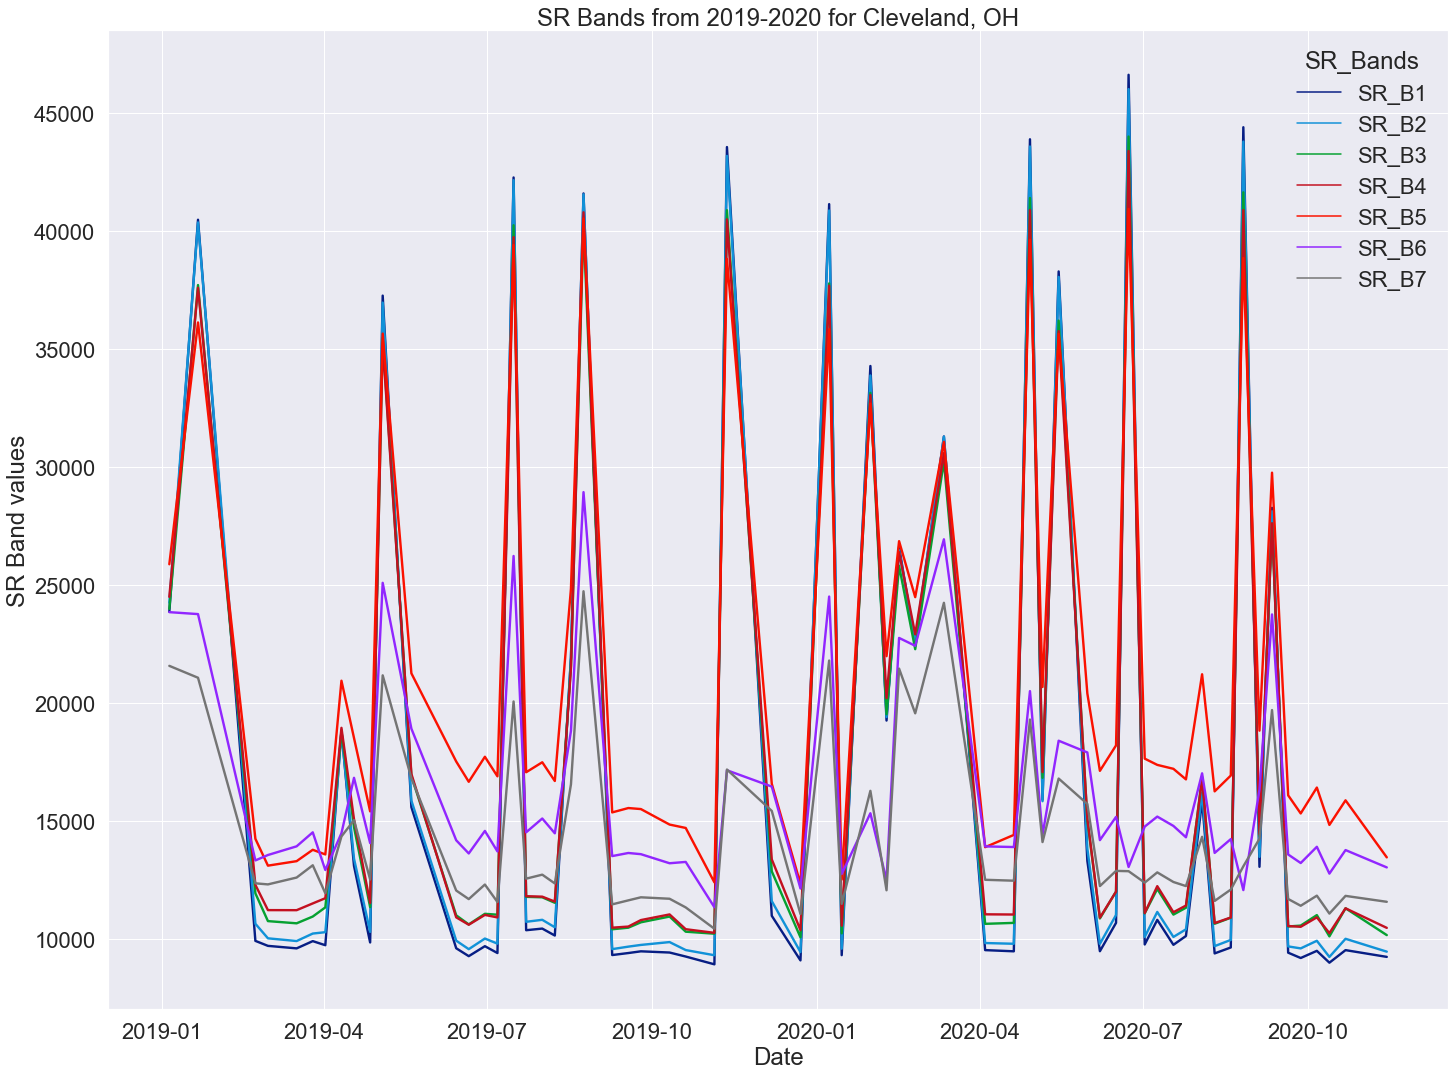

In [141]:
import seaborn as sns

# Create an array with the corresponding SR Band colors from Google Earth Engine
colors = {'SR_B1': "#071e84", 'SR_B2': "#1192d8", 'SR_B3': "#06a131", 'SR_B4': "#c31020", 'SR_B5':"#fb1100", 'SR_B6':"#9126ff", 'SR_B7':"#747474"}

# Plot line plot
plt.figure(figsize=(24,18))
sns.set(font_scale = 2)
sns.lineplot(data=df0_pivot.reset_index(), x='Date', y='SR_Band_value', palette=colors, hue='SR_Bands', linewidth= 2.4)
plt.ylabel('SR Band values')
plt.title('SR Bands from 2019-2020 for Cleveland, OH')
plt.show()

In [143]:
# Do the same for 2020-2021 data
# Create new df with index set to 'Date'
df1_indexed = df1.set_index('Date')

#Create label for indexes
df1_index = df1_indexed.index

# Melt df
df1_melt = df1.melt(id_vars=['Date'], var_name='SR_Bands', value_name='SR_Band_value')

In [144]:
# Pivot table; index by Date and SR_Bands
df1_pivot = df1_melt.pivot_table(index=['Date', 'SR_Bands'])
df1_pivot.head()

SR_Band_value
Date       SR_Bands               
2020-01-08 SR_B1         41135.459
           SR_B2         40865.757
           SR_B3         37775.924
           SR_B4         37677.961
           SR_B5         35834.837

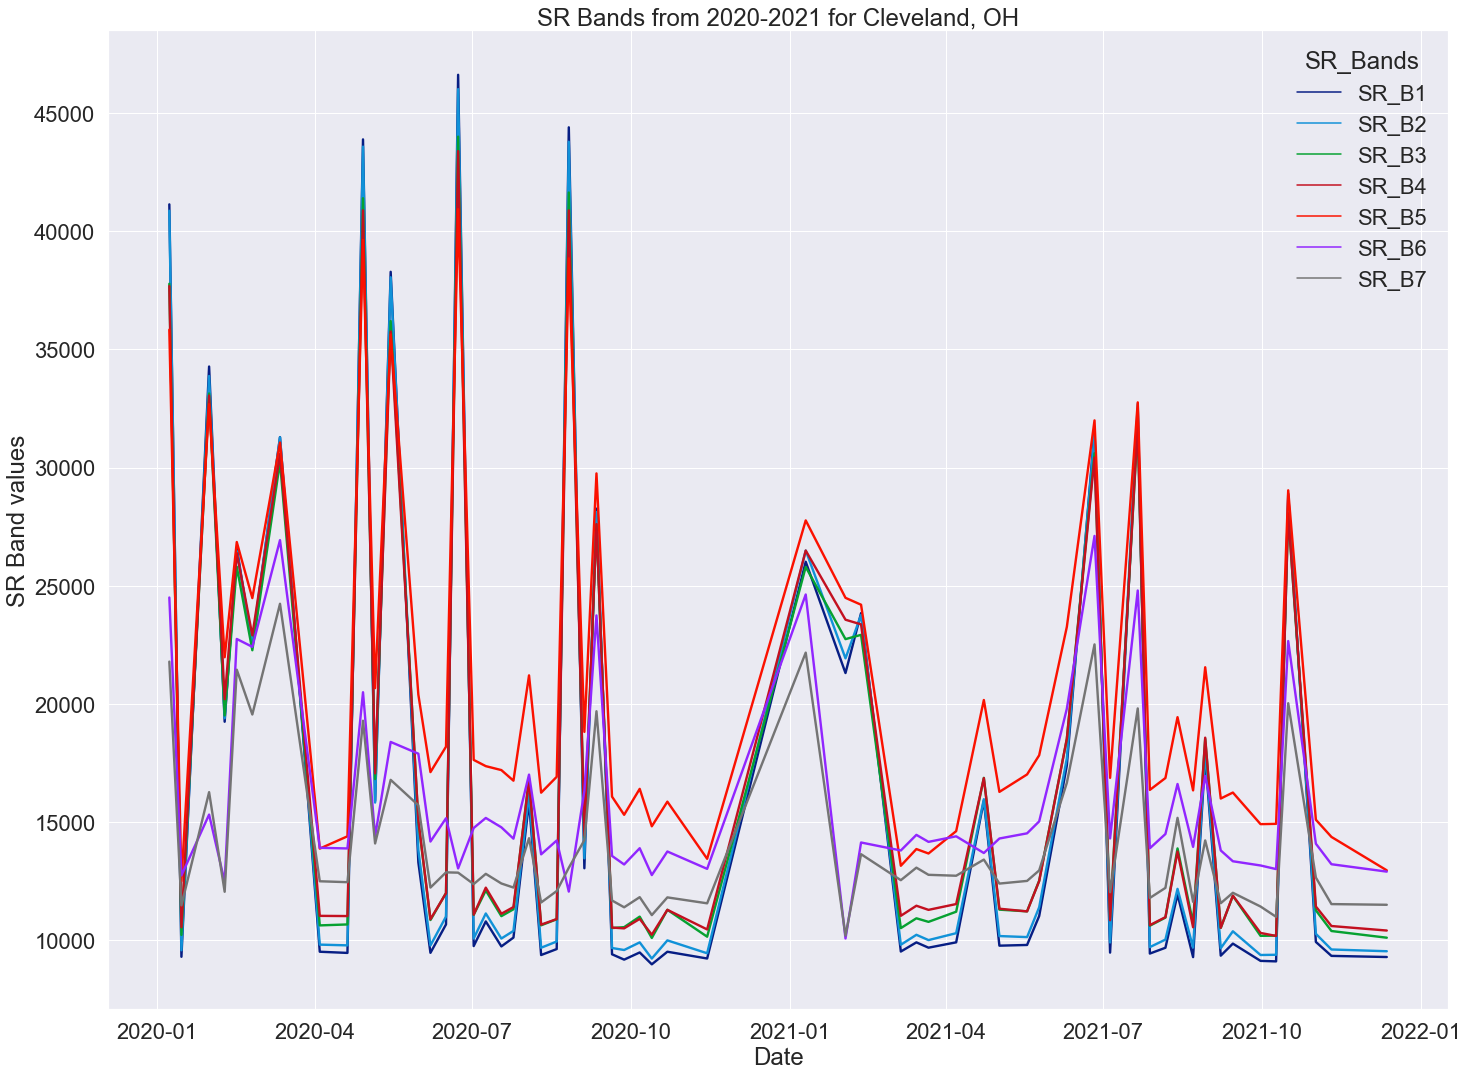

In [145]:
# Plot line plot
plt.figure(figsize=(24,18))
sns.set(font_scale = 2)
sns.lineplot(data=df1_pivot.reset_index(), x='Date', y='SR_Band_value', palette=colors, hue='SR_Bands', linewidth= 2.4)
plt.ylabel('SR Band values')
plt.title('SR Bands from 2020-2021 for Cleveland, OH')
plt.show()

These plots were already generated using Google Earth Engine, however here I'm able to manipulate the values for classification or regression modeling. For reference, below are the plots produced from Google Earth Engine with the same data.

I. 2019 (Cleveland, OH)
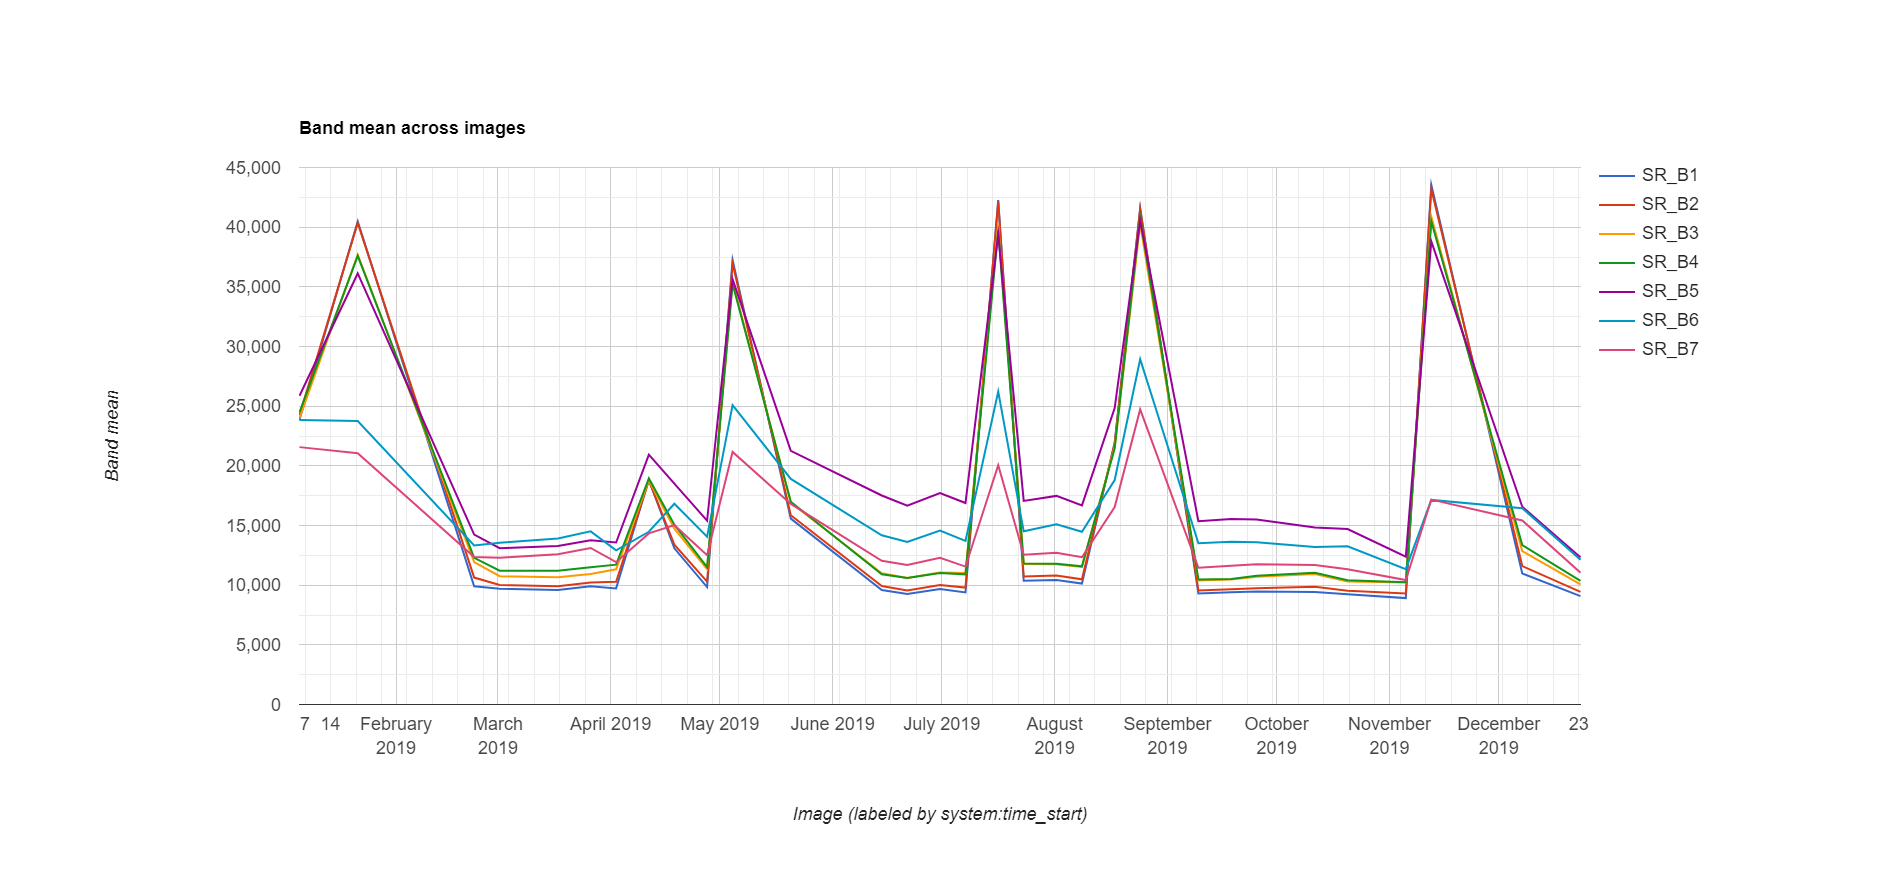

II. 2020 (Cleveland, OH)
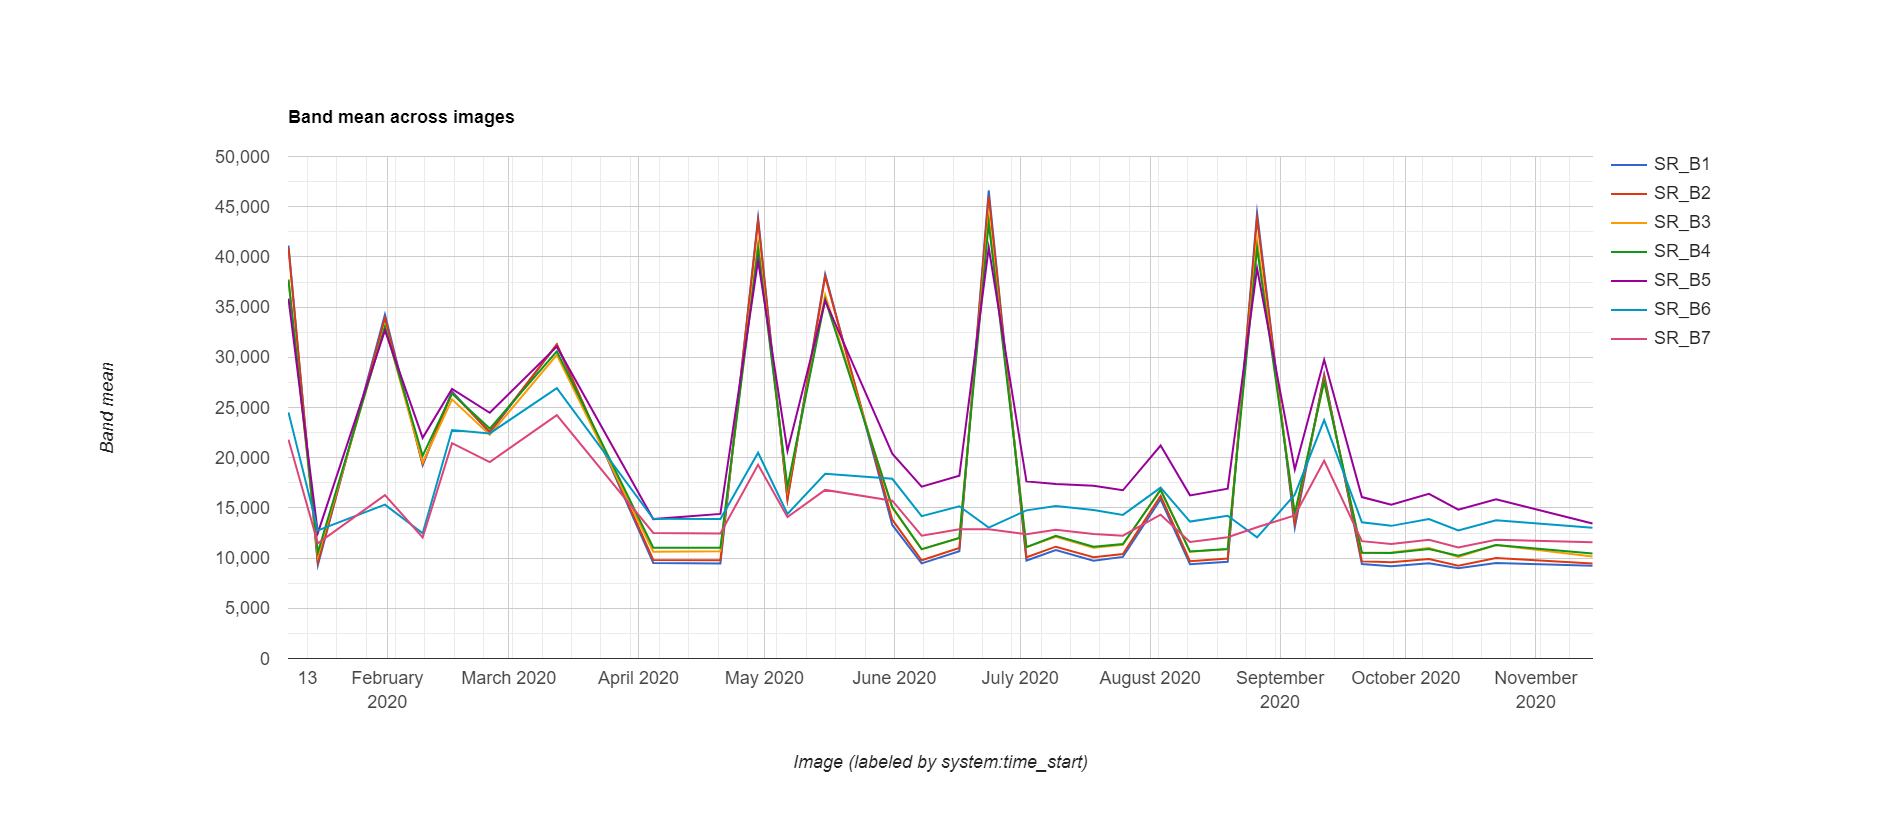

III. 2021 (Cleveland, OH)
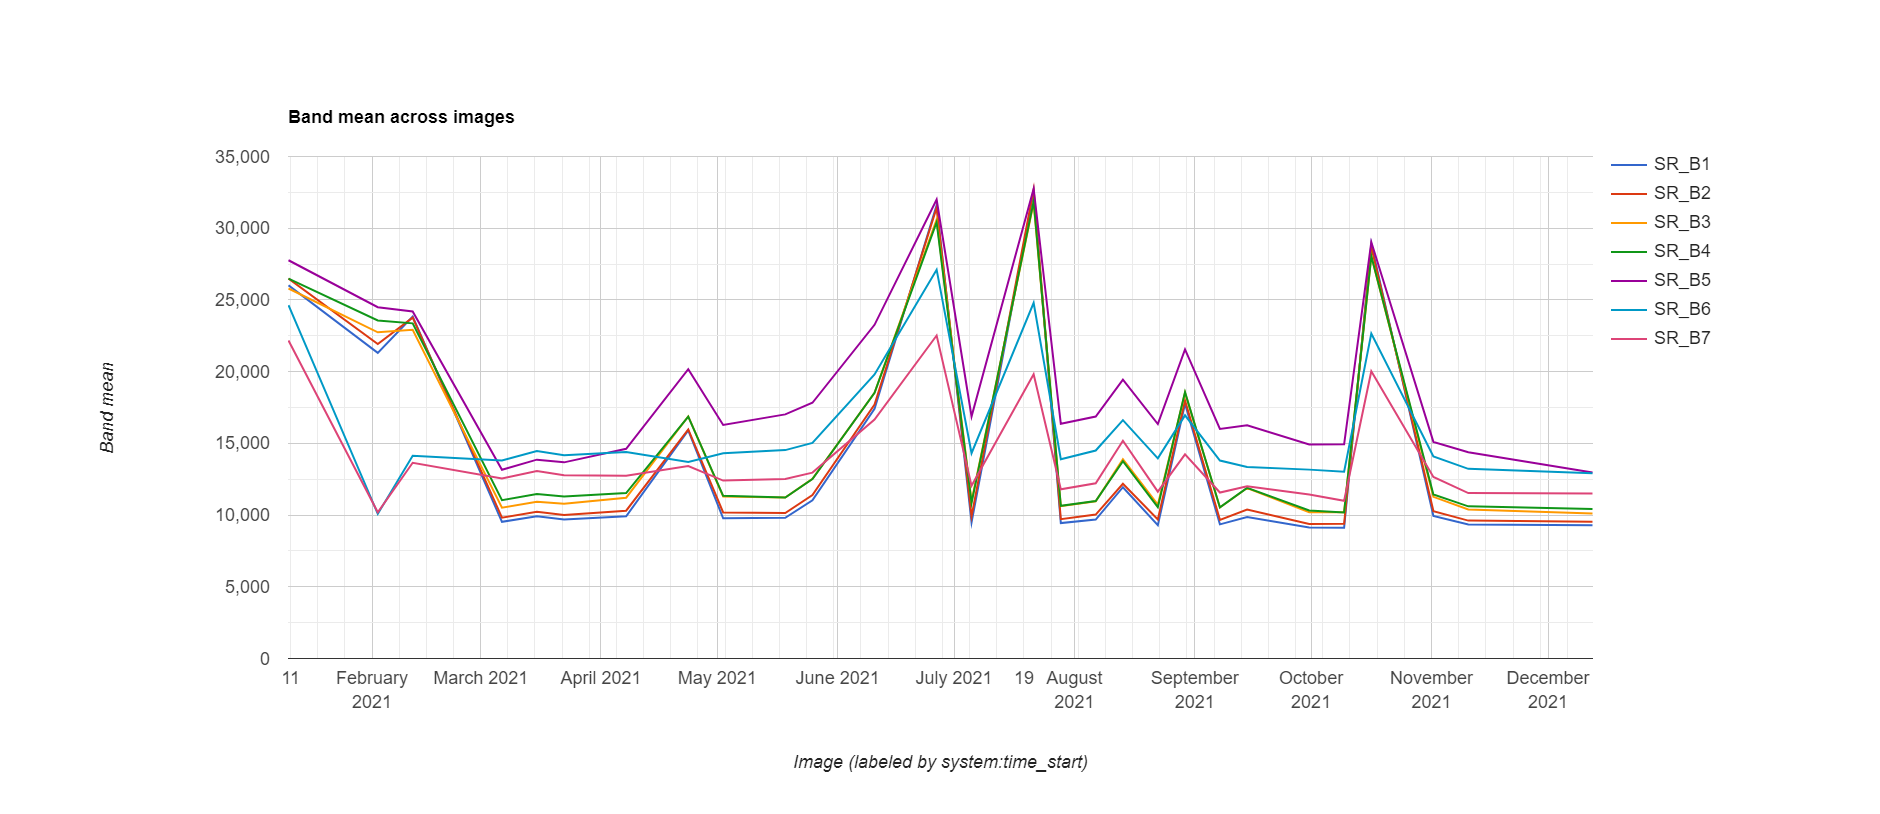